In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset, Dataset, TensorDataset
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import random
from scipy.linalg import sqrtm
from geoclip import geoclip


def set_seed(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False


**Synthetic Gaussian Dataset**

Epoch 1/50, Test MSE: 5.2590
Epoch 2/50, Test MSE: 2.7116
Epoch 3/50, Test MSE: 1.1226
Epoch 4/50, Test MSE: 0.2846
Epoch 5/50, Test MSE: 0.0431
Epoch 6/50, Test MSE: 0.0142
Epoch 7/50, Test MSE: 0.0068
Epoch 8/50, Test MSE: 0.0033
Epoch 9/50, Test MSE: 0.0017
Epoch 10/50, Test MSE: 0.0009
Epoch 11/50, Test MSE: 0.0006
Epoch 12/50, Test MSE: 0.0005
Epoch 13/50, Test MSE: 0.0003
Epoch 14/50, Test MSE: 0.0003
Epoch 15/50, Test MSE: 0.0003
Epoch 16/50, Test MSE: 0.0004
Epoch 17/50, Test MSE: 0.0003
Epoch 18/50, Test MSE: 0.0003
Epoch 19/50, Test MSE: 0.0003
Epoch 20/50, Test MSE: 0.0003
Epoch 21/50, Test MSE: 0.0002
Epoch 22/50, Test MSE: 0.0002
Epoch 23/50, Test MSE: 0.0002
Epoch 24/50, Test MSE: 0.0002
Epoch 25/50, Test MSE: 0.0002
Epoch 26/50, Test MSE: 0.0002
Epoch 27/50, Test MSE: 0.0002
Epoch 28/50, Test MSE: 0.0002
Epoch 29/50, Test MSE: 0.0002
Epoch 30/50, Test MSE: 0.0003
Epoch 31/50, Test MSE: 0.0002
Epoch 32/50, Test MSE: 0.0002
Epoch 33/50, Test MSE: 0.0002
Epoch 34/50, Test M

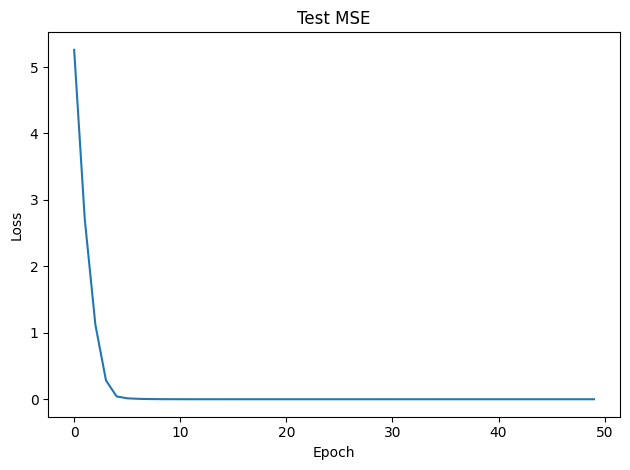

In [3]:
 ############### Example ########################

######## Synthetic Gaussian Dataset ############
set_seed(42)

# Parameters
n_samples = 20000
input_dim = 10

# Ground truth weights and bias
true_w = torch.randn(input_dim, 1)
true_b = torch.randn(1)

# Generate 5 correlated features
A_corr = torch.randn(5, 5)
X_corr = torch.randn(n_samples, 5) @ A_corr.T  # Correlated block

# Generate 5 independent features
X_indep = torch.randn(n_samples, 5)  # i.i.d. standard normal

# Combine them
X = torch.cat([X_corr, X_indep], dim=1)  # Shape: (n_samples, 10)

# Generate targets with noise
noise = 0.01 * torch.randn(n_samples, 1)
y = X @ true_w + true_b + noise

# Wrap in DataLoader
dataset = TensorDataset(X, y)
train_dataset, test_dataset = train_test_split(dataset, test_size=0.15, random_state=42)


################# Model #######################

class LinearRegression(nn.Module):
    def __init__(self, input_dim, num_classes=1):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.linear(x)


#################### Train ##########################

# Parameters
input_dim = 10
num_classes = 1
batch_size = 1024
learning_rate = 0.05
num_epochs = 50
noise_multiplier = 0.2  # sigma
h1 = 1e-15
h2 = 10
beta1 = 0.99
beta2 = 0.999

# Load data
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model = LinearRegression(input_dim, num_classes)
criterion = nn.MSELoss()

# Train with GeoClip
train_losses, test_accuracies = geoclip(
    model,
    criterion,
    train_loader,
    test_loader,
    learning_rate=learning_rate,
    batch_size=batch_size,
    sigma=noise_multiplier,
    num_epochs=num_epochs,
    beta1=beta1,
    beta2=beta2,
    h1=h1,
    h2=h2,
    C=1.0
)

# Plot results
plt.plot(test_accuracies)
plt.title('Test MSE')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.tight_layout()
plt.show()


**Diabetes Dataset**

Epoch 1/40, Test MSE: 0.6708
Epoch 2/40, Test MSE: 0.4612
Epoch 3/40, Test MSE: 0.3169
Epoch 4/40, Test MSE: 0.2122
Epoch 5/40, Test MSE: 0.1462
Epoch 6/40, Test MSE: 0.1050
Epoch 7/40, Test MSE: 0.0765
Epoch 8/40, Test MSE: 0.0624
Epoch 9/40, Test MSE: 0.0467
Epoch 10/40, Test MSE: 0.0392
Epoch 11/40, Test MSE: 0.0338
Epoch 12/40, Test MSE: 0.0320
Epoch 13/40, Test MSE: 0.0302
Epoch 14/40, Test MSE: 0.0290
Epoch 15/40, Test MSE: 0.0271
Epoch 16/40, Test MSE: 0.0270
Epoch 17/40, Test MSE: 0.0261
Epoch 18/40, Test MSE: 0.0259
Epoch 19/40, Test MSE: 0.0277
Epoch 20/40, Test MSE: 0.0267
Epoch 21/40, Test MSE: 0.0257
Epoch 22/40, Test MSE: 0.0250
Epoch 23/40, Test MSE: 0.0240
Epoch 24/40, Test MSE: 0.0254
Epoch 25/40, Test MSE: 0.0254
Epoch 26/40, Test MSE: 0.0262
Epoch 27/40, Test MSE: 0.0249
Epoch 28/40, Test MSE: 0.0247
Epoch 29/40, Test MSE: 0.0243
Epoch 30/40, Test MSE: 0.0234
Epoch 31/40, Test MSE: 0.0235
Epoch 32/40, Test MSE: 0.0253
Epoch 33/40, Test MSE: 0.0254
Epoch 34/40, Test M

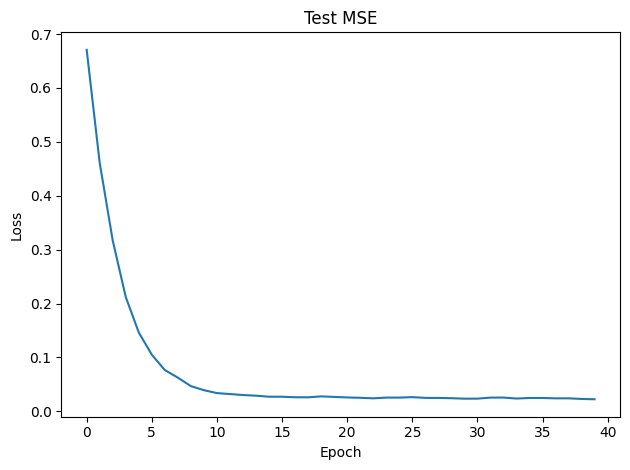

In [4]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Diabetes Dataset
data = load_diabetes()
X, y = data.data, data.target  # X: [n_samples, n_features], y: [n_samples]

y = y / y.max()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Step 2: Train with GeoClip

# Parameters
input_dim = 10
num_classes = 1
batch_size = 32
learning_rate = 0.01
num_epochs = 40
noise_multiplier = 0.2
h1 = 1e-15
h2 = 10
beta1 = 0.99
beta2 = 0.999

# Load data
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


model = LinearRegression(input_dim, num_classes)
criterion = nn.MSELoss()

train_losses, test_accuracies = geoclip(
    model,
    criterion,
    train_loader,
    test_loader,
    learning_rate=learning_rate,
    batch_size=batch_size,
    sigma=noise_multiplier,
    num_epochs=num_epochs,
    beta1=beta1,
    beta2=beta2,
    h1=h1,
    h2=h2,
    C=1.0
)

# Plot results
plt.plot(test_accuracies)
plt.title('Test MSE')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.tight_layout()
plt.show()